In [10]:
import numpy as np
import numpy.linalg as la
from time import time
from matplotlib import pyplot as plt
import scipy.sparse as spa

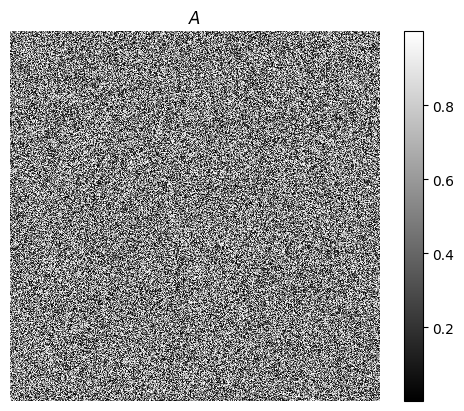

In [7]:
# Set dimension
n = 10000

# Generate random matrix
A = np.random.rand(n, n)
b = np.random.rand(n)

plt.imshow(A, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.axis('off')
plt.title(r'$A$')
plt.show()

Let's solve $Ax = b$

In [8]:
# Solve with inverse
start_time = time()
invA = la.inv(A)
x = invA.dot(b)
print("Time to solve with inverse = %.5f sec" % (time() - start_time))

Time to solve with inverse = 8.65265 sec


In [9]:
# Solve with standard method
start_time = time()
x = la.solve(A, b)
print("Time to solve default method = %.5f sec" % (time() - start_time))

Time to solve default method = 3.03246 sec


In [43]:
# Setup sparse matrix and show that inverse is completely dense
n = 5

# Create a sparse matrix with non-zero entries in the first row
first_row = spa.csr_matrix(([1.] * n, ([0] * n, range(n))), shape=(n, n))

# Create a sparse matrix with non-zero entries in the last column (except top right element)
last_column = spa.csr_matrix(([1.] * (n - 1), (range(1,n), [n - 1] * (n-1))), shape=(n, n))

# Create a sparse matrix with non-zero entries in the counterdiagonal
counterdiag = spa.csr_matrix(([1.] * (n - 1), (range(1, n), range(n - 2, -1, -1))), shape=(n, n))

# Sum the matrices to get the final arrow pattern with counterdiagonal
A = first_row + last_column + counterdiag

print(A.toarray())  # A is sparse

[[1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1.]]


In [44]:
invA = la.inv(A.toarray())
print(invA)  # The inverse of A is completely dense!

[[ 0.33333333 -0.33333333 -0.33333333 -0.33333333  0.66666667]
 [ 0.33333333 -0.33333333 -0.33333333  0.66666667 -0.33333333]
 [ 0.33333333 -0.33333333  0.66666667 -0.33333333 -0.33333333]
 [ 0.33333333  0.66666667 -0.33333333 -0.33333333 -0.33333333]
 [-0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]]
